K-Nearest Neighbors** is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

## TOC

### 1. About the dataset
### 2. Download from S3 Blob Storage and Load data into a dataframe
### 3. Data Analysis using Visualization
### 4. Define the feature set and check the labels
### 5. Normalize the data
### 6. Perform Train-Test split using sklearn Train-Test_Split() function
### 7. Create kNN classification model
### 8. Train the model using various values of k and examine the accuracy
### 9. Evaluate the model on training data
### 10.  Use the model on test data to predict labels
### 11. Compute Accuracy
### 12. Some additional practice and play

In [51]:
# Import packages (also called 'libraries' or 'modules')

import itertools # a collection of tools for handling iterators. Simply put, iterators are data types that can be used in a
                 # for loop. In example, the most common iterator in Python is the list.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter # What is this module used for? Ans: TBD.
from sklearn import preprocessing
from sklearn.model_selection import train_test_split # To perform Train-Test split
from sklearn.neighbors import KNeighborsClassifier # To perform the kNN classification
from sklearn import metrics # To compute the accuracy (Jaccard Index, F1 Score, etc.)

%matplotlib inline

#### About the dataset

A telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

The target field, called __custcat__, has four possible values that correspond to the four customer groups, as follows:
  1- Basic Service
  2- E-Service
  3- Plus Service
  4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use K nearest neighbour.

In [3]:
# Download the data

!curl https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv -o teleCust1000t.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 37048  100 37048    0     0    99k      0 --:--:-- --:--:-- --:--:--   99k


In [5]:
# Load the csv data into a dataframe and see some records

df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [8]:
# Data Analysis using Visualization

df['custcat'].value_counts() # How many of each class is in the dataset

# Class definitions are: 1-Plus Service, 2-Basic Service, 3- Total Service, 4-E-Service Customers

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

(9.0,
 1668.0,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002227BED60B8>]],
       dtype=object))

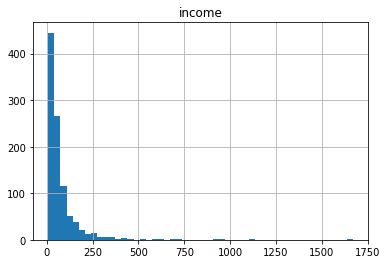

In [11]:
min(df['income']), max(df['income']), df.hist(column = 'income', bins = 50)

In [12]:
# Define a Feature set

# First, what are the columns
df.columns

# Feature_X = 

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [31]:
# Define a Feature set

# First, what are the columns
# df.columns

# Convert the pandas dataframe to a numpy array!!!!!! WHY???????? ANS: TBD

# Feature_X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']]
Feature_X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values
# Note the above way to convert a pandas df into a numpy array!!!!!!
type(Feature_X), Feature_X[0:5]
# Feature_X.to_numpy()
# type(Feature_X), Feature_X[0:5]

(numpy.ndarray,
 array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
        [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
        [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
        [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
        [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]]))

In [42]:
# What are the labels?

y = df['custcat'].values
df['custcat'].values[0:6] # The first six rows of the labelset

array([1, 4, 3, 1, 3, 3], dtype=int64)

### Normalize Data

Why? Ans: Because it is a good practice, especially since algorithms such as kNN are based on distances (or metrics)

In [40]:
Feature_X = preprocessing.StandardScaler().fit(Feature_X).transform(Feature_X.astype(float))
len(Feature_X), Feature_X.shape, Feature_X[0:5]

(1000,
 (1000, 11),
 array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
         -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
         -0.23065004],
        [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
          0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
          2.55666158],
        [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
          0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
         -0.23065004],
        [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
         -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
         -0.92747794],
        [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
         -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
          1.16300577]]))

In [44]:
# Train Test Split using the train_test_split() library in sklearn

# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


#### Classification using the kNN algorithm

In [45]:
# from sklearn.neighbors import KNeighborsClassifier

In [48]:
# Training

# k = 4

neibuhr = KNeighborsClassifier(n_neighbors = 4).fit(X_train, y_train)
neibuhr

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [49]:
# Predicting

yhat = neibuhr.predict(X_test)
yhat

array([3, 1, 3, 4, 4, 3, 3, 1, 2, 2, 4, 1, 3, 4, 3, 1, 2, 2, 3, 2, 3, 3,
       4, 2, 1, 3, 1, 4, 1, 4, 2, 4, 4, 2, 1, 2, 3, 4, 1, 1, 1, 4, 3, 2,
       3, 1, 4, 1, 2, 4, 3, 1, 2, 1, 3, 1, 3, 1, 1, 1, 1, 2, 4, 2, 4, 3,
       1, 2, 2, 2, 1, 3, 3, 3, 1, 2, 3, 3, 1, 3, 4, 3, 1, 1, 1, 1, 3, 4,
       1, 3, 3, 1, 1, 3, 1, 3, 1, 2, 1, 4, 3, 1, 3, 1, 3, 2, 3, 2, 2, 3,
       1, 1, 2, 4, 3, 1, 1, 2, 2, 1, 1, 1, 2, 4, 1, 1, 4, 4, 1, 1, 1, 3,
       1, 2, 1, 3, 2, 1, 2, 1, 2, 3, 3, 2, 1, 1, 1, 4, 1, 2, 1, 3, 2, 3,
       3, 4, 3, 1, 1, 2, 1, 3, 1, 1, 3, 2, 1, 1, 4, 1, 2, 3, 3, 3, 4, 3,
       4, 1, 4, 4, 3, 2, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 2, 2, 3, 3, 1, 2,
       2, 3], dtype=int64)

In [50]:
# Accuracy Evaluation

In multilabel classification, __accuracy classification score__ is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [54]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neibuhr.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.55625
Test set Accuracy:  0.26


Practice: Build the model with k=6

In [55]:
# Train Model
neibuhr = KNeighborsClassifier(n_neighbors = 4).fit(X_train, y_train)
neibuhr
# Use Trained model to predict on test data
yhat = neibuhr.predict(X_test)
# Compute accuracy of training and testing
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neibuhr.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.55625
Test set Accuracy:  0.26


### Picking the Optimum k-value
create the model with k value 1 and predict with test set data and check the accuracy and other parameters then repeat the same process after increasing the k value by 1 each time.

In [72]:
kVal = []
Accuracy = []
for i in range(1,30):
    neibuhr = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    accuracy = metrics.accuracy_score(y_train, neibuhr.predict(X_train))
    kVal.append(i)
    Accuracy.append(accuracy)
    
print("Train set Accuracy:", Accuracy, "k-value is: ", i)
print("List of k-values is: ", kVal, "List of Accuracy values is: ", Accuracy)

Train set Accuracy: [1.0, 0.6525, 0.5925, 0.55625, 0.55, 0.495, 0.49625, 0.5, 0.48375, 0.48125, 0.47, 0.48125, 0.4575, 0.4525, 0.4425, 0.45, 0.4325, 0.44, 0.45125, 0.43375, 0.435, 0.43625, 0.44, 0.4325, 0.43, 0.42375, 0.415, 0.41125, 0.4075] k-value is:  29
List of k-values is:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] List of Accuracy values is:  [1.0, 0.6525, 0.5925, 0.55625, 0.55, 0.495, 0.49625, 0.5, 0.48375, 0.48125, 0.47, 0.48125, 0.4575, 0.4525, 0.4425, 0.45, 0.4325, 0.44, 0.45125, 0.43375, 0.435, 0.43625, 0.44, 0.4325, 0.43, 0.42375, 0.415, 0.41125, 0.4075]


In [93]:
# From the lists above, create a dictionary with kVal and Accuracy as keys

dict = {'k-Value':kVal, 'Accuracy':Accuracy}

In [78]:
# convert the dictionary above into a dataframe

valdf = pd.DataFrame(dict)
valdf.shape, valdf.head()

((29, 2),
    k-Value  Accuracy
 0        1   1.00000
 1        2   0.65250
 2        3   0.59250
 3        4   0.55625
 4        5   0.55000)

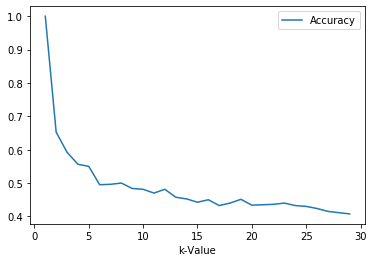

In [86]:
# Plot kvalues versus accuracy as a line graph

valdf.plot(x = 'k-Value', y = 'Accuracy', kind = 'line')
plt.show()

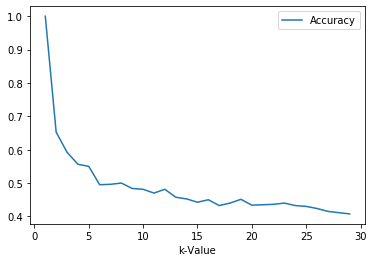

In [92]:
# Another way to plot

ax = plt.gca() # gcs stands for 'get current axes'
valdf.plot(kind= 'line', x = 'k-Value', y = 'Accuracy',ax=ax)
# df.plot(kind='scatter', x = 'k-Value', y = 'Accuracy', color='red', ax=ax)

plt.show()